In [1]:
import sys
from math import pi
from pathlib import Path

import numpy as np
import pygfunction as gt
import tabulate

In [2]:
here = Path()
here.resolve()

PosixPath('/home/mitchute/Projects/BHResist/notebooks')

In [3]:
root = here / ".."
root.exists()

True

In [4]:
sys.path.insert(0, str(root))

In [5]:
from bhr.borehole import Borehole

# Comparison - PyGFunction

Example code taken from [here](https://github.com/MassimoCimmino/pygfunction/blob/9217d8d77c124239d4c1c881e34eb44c9ac6ade4/examples/custom_borehole.py)

## Single U-tube

In [6]:
# Borehole dimensions
D = 5.  # Borehole buried depth (m)
H = 400.  # Borehole length (m)
r_b = 0.0875  # Borehole radius (m)

# Pipe dimensions (all configurations)
epsilon = 1.0e-6  # Pipe roughness (m)

# Pipe dimensions (single U-tube and double U-tube)
r_out = 0.0211  # Pipe outer radius (m)
r_in = 0.0147  # Pipe inner radius (m)
D_s = 0.052  # Shank spacing (m)

# Pipe dimensions (coaxial)
r_in_in = 0.0221  # Inside pipe inner radius (m)
r_in_out = 0.025  # Inside pipe outer radius (m)
r_out_in = 0.0487  # Outer pipe inside radius (m)
r_out_out = 0.055  # Outer pipe outside radius (m)
# Vectors of inner and outer pipe radii
# Note : The dimensions of the inlet pipe are the first elements of
#        the vectors. In this example, the inlet pipe is the inside pipe.
r_inner = np.array([r_in_in, r_out_in])  # Inner pipe radii (m)
r_outer = np.array([r_in_out, r_out_out])  # Outer pip radii (m)

# Ground properties
k_s = 2.0  # Ground thermal conductivity (W/m.K)

# Grout properties
k_g = 1.0  # Grout thermal conductivity (W/m.K)

# Pipe properties
k_p = 0.4  # Pipe thermal conductivity (W/m.K)

# Fluid properties
# Total fluid mass flow rate per borehole (kg/s)
m_flow_borehole = 1.0
# The fluid is propylene-glycol (20 %) at 20 degC
fluid = gt.media.Fluid('MPG', 20.)
cp_f = fluid.cp  # Fluid specific isobaric heat capacity (J/kg.K)
rho_f = fluid.rho  # Fluid density (kg/m3)
mu_f = fluid.mu  # Fluid dynamic viscosity (kg/m.s)
k_f = fluid.k  # Fluid thermal conductivity (W/m.K)

# -------------------------------------------------------------------------
# Initialize borehole model
# -------------------------------------------------------------------------

borehole = gt.boreholes.Borehole(H, D, r_b, x=0., y=0.)

# -------------------------------------------------------------------------
# Define a single U-tube borehole
# -------------------------------------------------------------------------

# Pipe positions
# Single U-tube [(x_in, y_in), (x_out, y_out)]
pos_single = [(-D_s, 0.), (D_s, 0.)]

# Pipe thermal resistance
R_p = gt.pipes.conduction_thermal_resistance_circular_pipe(
    r_in, r_out, k_p)

# Fluid to inner pipe wall thermal resistance
m_flow_pipe = m_flow_borehole
h_f = gt.pipes.convective_heat_transfer_coefficient_circular_pipe(
    m_flow_pipe, r_in, mu_f, rho_f, k_f, cp_f, epsilon)
R_f = 1.0 / (h_f * 2 * pi * r_in)

# Single U-tube GHE in borehole
SingleUTube = gt.pipes.SingleUTube(
    pos_single, r_in, r_out, borehole, k_s, k_g, R_f + R_p)

# Evaluate and print the effective borehole thermal resistance
R_b = SingleUTube.effective_borehole_thermal_resistance(
    m_flow_borehole, fluid.cp)

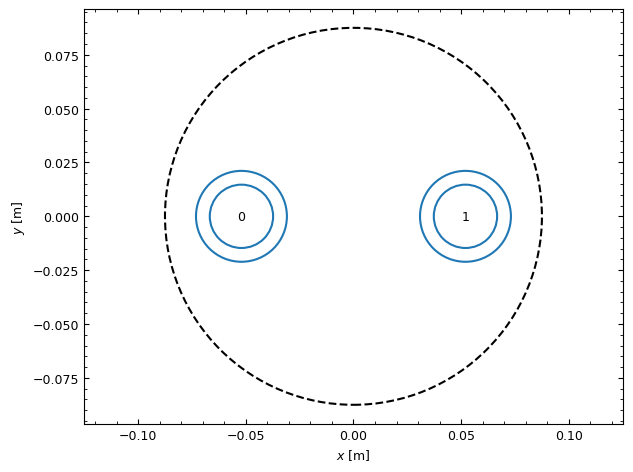

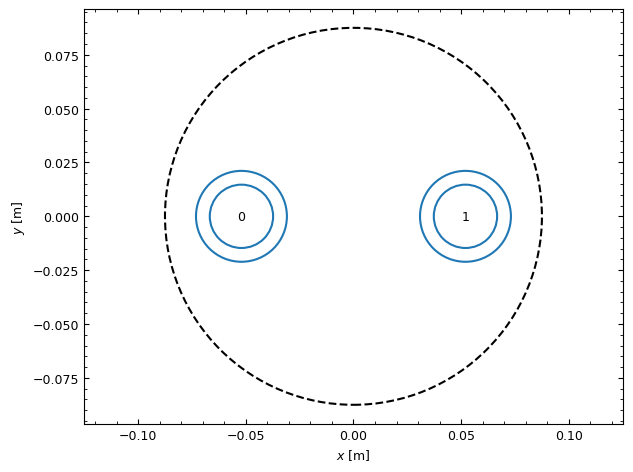

In [18]:
SingleUTube.visualize_pipes()

In [19]:
single_bhr = Borehole()
single_bhr.init_single_u_borehole(
    borehole_diameter=r_b * 2,
    pipe_outer_diameter=r_out * 2,
    pipe_dimension_ratio=(2 * r_out) / (r_out - r_in),
    length=H,
    shank_space=2 * (D_s - r_out),
    pipe_conductivity=k_p,
    grout_conductivity=k_g,
    soil_conductivity=k_s,
    fluid_type="PROPYLENEGLYCOL",
    fluid_concentration=0.2
)

In [20]:
temp = 20

single_data = [
    ["", "pygfunction", "BHResist"],
    ["Borehole Dia.", r_b * 2, single_bhr._bh.borehole_diameter],
    ["Pipe Outer Dia.", r_out * 2, single_bhr._bh.pipe_outer_diameter],
    ["Pipe Inner Dia.", r_in * 2, single_bhr._bh.pipe_inner_diameter],
    ["Rp + Rf", f"{R_p + R_f:0.5f}", f"{single_bhr._bh.calc_pipe_resist(m_flow_borehole, temp):0.5f}"],
    ["Rb", f"{R_b:0.5f}", f"{single_bhr.calc_bh_resist(m_flow_borehole, temp):0.5f}"],
]

table = tabulate.tabulate(single_data, tablefmt='html')
table

,pygfunction,BHResist
Borehole Dia.,0.175,0.175
Pipe Outer Dia.,0.0422,0.0422
Pipe Inner Dia.,0.0294,0.0294
Rp + Rf,0.14679,0.14678
Rb,0.17376,0.21899
